## TITLE: REWARD COMMUNITY ENGAGEMENT

In [2]:
# library needed for the project
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [3]:
file = open('WhatsApp_Chat.txt',mode='r')
watsup_content = file.read()
file.close()
watsup_content

'[8/14/22, 8:14:30 PM] Python Incubator Program : \u200eMessages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them.\n[8/14/22, 9:02:25 PM] \u202a+234\xa0816\xa0224\xa02454\u202c: Good evening o people in this group just dey enjoy no assignment no class no project it is well. I\'ve marked assignment week 8 and scores has been returned please verify careful in case there is any error before the scores are posted to the scoreboard\n[8/14/22, 9:04:44 PM] OG: It’s week 10 u marked on mine sir u haven’t marked week 8\n[8/14/22, 9:05:32 PM] \u202a+234\xa0816\xa0224\xa02454\u202c: Oh sorry yes it\'s week 10...I\'m working on week 8...🤝\n\u200e[8/14/22, 9:05:47 PM] OG: \u200esticker omitted\n[8/14/22, 9:45:21 PM] \u202a+234\xa0816\xa0559\xa03661\u202c: Yet to be scored sir\n[8/14/22, 9:46:44 PM] \u202a+234\xa0816\xa0224\xa02454\u202c: Yes you and tomisin submitted a wrong file...so I\'ve not marked the two\n[8/14/22, 9:47:42 PM] \u202

In [4]:
contents=watsup_content.split("\n")

In [5]:
df = pd.DataFrame({"data":contents})
df.head(4)

,data
0,"[8/14/22, 8:14:30 PM] Python Incubator Program..."
1,"[8/14/22, 9:02:25 PM] ‪+234 816 224 2454‬: Goo..."
2,"[8/14/22, 9:04:44 PM] OG: It’s week 10 u marke..."
3,"[8/14/22, 9:05:32 PM] ‪+234 816 224 2454‬: Oh ..."


## Extracting Group names
First we are extracting group names by finding the various patterns underlying in our data.

Group name lies in :

changed the subject from "X"

Person X created group "X"

Now we are going to extract using these 2 patterns.

In [6]:
df["Group_Name"]=df["data"].str.extract("(created group\s.*|changed the subject from\s.*)",expand=True)

In [7]:
df["Group_Name"]=df["Group_Name"].str.replace("created group ","")
df["Group_Name"]=df["Group_Name"].str.replace("changed the subject from ","")

In [8]:
df.head()

,data,Group_Name
0,"[8/14/22, 8:14:30 PM] Python Incubator Program...",NaN
1,"[8/14/22, 9:02:25 PM] ‪+234 816 224 2454‬: Goo...",NaN
2,"[8/14/22, 9:04:44 PM] OG: It’s week 10 u marke...",NaN
3,"[8/14/22, 9:05:32 PM] ‪+234 816 224 2454‬: Oh ...",NaN
4,"‎[8/14/22, 9:05:47 PM] OG: ‎sticker omitted",NaN


### 'ffill' stands for 'forward fill' and will propagate last valid observation forward

In [9]:
df["Group_Name"].fillna(method='ffill',inplace=True)

In [10]:
df["Group_Name"]=df["Group_Name"].astype(str)
df["Group_Name"]=df["Group_Name"].apply(lambda x:x.split("to"))
df["Group_Name"]=df["Group_Name"].apply(lambda x:x[-1])

In [11]:
df.head()

,data,Group_Name
0,"[8/14/22, 8:14:30 PM] Python Incubator Program...",nan
1,"[8/14/22, 9:02:25 PM] ‪+234 816 224 2454‬: Goo...",nan
2,"[8/14/22, 9:04:44 PM] OG: It’s week 10 u marke...",nan
3,"[8/14/22, 9:05:32 PM] ‪+234 816 224 2454‬: Oh ...",nan
4,"‎[8/14/22, 9:05:47 PM] OG: ‎sticker omitted",nan


Extracting Dates and Time and also creating their word count 

In [12]:
df["Date"]=df["data"].str.extract('(\d+\/\d+\/\d+)',expand=True)

In [13]:
df["time"]=df["data"].str.extract('(\d+\:\d+\:\d+\s\w*)',expand=True)

Extracting chat and username from the data column

In [14]:
df["Name"]=df["data"].str.extract('(\d\s\w+.*:)',expand=True)
df["Text"]=df["data"].str.extract("(:\s\w*.*)",expand=True)
df["Word_count"]=df["data"].apply(lambda x:len(x))

In [15]:
df.head()

,data,Group_Name,Date,time,Name,Text,Word_count
0,"[8/14/22, 8:14:30 PM] Python Incubator Program...",nan,8/14/22,8:14:30 PM,0 PM] Python Incubator Program :,: ‎Messages and calls are end-to-end encrypted...,170
1,"[8/14/22, 9:02:25 PM] ‪+234 816 224 2454‬: Goo...",nan,8/14/22,9:02:25 PM,5 PM] ‪+234 816 224 2454‬:,: Good evening o people in this group just dey...,294
2,"[8/14/22, 9:04:44 PM] OG: It’s week 10 u marke...",nan,8/14/22,9:04:44 PM,4 PM] OG:,: It’s week 10 u marked on mine sir u haven’t ...,83
3,"[8/14/22, 9:05:32 PM] ‪+234 816 224 2454‬: Oh ...",nan,8/14/22,9:05:32 PM,2 PM] ‪+234 816 224 2454‬:,: Oh sorry yes it's week 10...I'm working on w...,96
4,"‎[8/14/22, 9:05:47 PM] OG: ‎sticker omitted",nan,8/14/22,9:05:47 PM,7 PM] OG:,: ‎sticker omitted,43


In [16]:
df.drop('data', axis=1, inplace=True)

In [17]:
df.head()

,Group_Name,Date,time,Name,Text,Word_count
0,nan,8/14/22,8:14:30 PM,0 PM] Python Incubator Program :,: ‎Messages and calls are end-to-end encrypted...,170
1,nan,8/14/22,9:02:25 PM,5 PM] ‪+234 816 224 2454‬:,: Good evening o people in this group just dey...,294
2,nan,8/14/22,9:04:44 PM,4 PM] OG:,: It’s week 10 u marked on mine sir u haven’t ...,83
3,nan,8/14/22,9:05:32 PM,2 PM] ‪+234 816 224 2454‬:,: Oh sorry yes it's week 10...I'm working on w...,96
4,nan,8/14/22,9:05:47 PM,7 PM] OG:,: ‎sticker omitted,43


In [18]:
df.head()

,Group_Name,Date,time,Name,Text,Word_count
0,nan,8/14/22,8:14:30 PM,0 PM] Python Incubator Program :,: ‎Messages and calls are end-to-end encrypted...,170
1,nan,8/14/22,9:02:25 PM,5 PM] ‪+234 816 224 2454‬:,: Good evening o people in this group just dey...,294
2,nan,8/14/22,9:04:44 PM,4 PM] OG:,: It’s week 10 u marked on mine sir u haven’t ...,83
3,nan,8/14/22,9:05:32 PM,2 PM] ‪+234 816 224 2454‬:,: Oh sorry yes it's week 10...I'm working on w...,96
4,nan,8/14/22,9:05:47 PM,7 PM] OG:,: ‎sticker omitted,43


Removing null values from the name column

In [19]:
df = df[df['Name'].notna()]

In [20]:
df.head()

,Group_Name,Date,time,Name,Text,Word_count
0,nan,8/14/22,8:14:30 PM,0 PM] Python Incubator Program :,: ‎Messages and calls are end-to-end encrypted...,170
1,nan,8/14/22,9:02:25 PM,5 PM] ‪+234 816 224 2454‬:,: Good evening o people in this group just dey...,294
2,nan,8/14/22,9:04:44 PM,4 PM] OG:,: It’s week 10 u marked on mine sir u haven’t ...,83
3,nan,8/14/22,9:05:32 PM,2 PM] ‪+234 816 224 2454‬:,: Oh sorry yes it's week 10...I'm working on w...,96
4,nan,8/14/22,9:05:47 PM,7 PM] OG:,: ‎sticker omitted,43


converting time to 24 hrs

In [21]:
df["Time"] = pd.to_datetime(df['time']).dt.strftime('%H:%M')

In [22]:
df.head()

,Group_Name,Date,time,Name,Text,Word_count,Time
0,nan,8/14/22,8:14:30 PM,0 PM] Python Incubator Program :,: ‎Messages and calls are end-to-end encrypted...,170,20:14
1,nan,8/14/22,9:02:25 PM,5 PM] ‪+234 816 224 2454‬:,: Good evening o people in this group just dey...,294,21:02
2,nan,8/14/22,9:04:44 PM,4 PM] OG:,: It’s week 10 u marked on mine sir u haven’t ...,83,21:04
3,nan,8/14/22,9:05:32 PM,2 PM] ‪+234 816 224 2454‬:,: Oh sorry yes it's week 10...I'm working on w...,96,21:05
4,nan,8/14/22,9:05:47 PM,7 PM] OG:,: ‎sticker omitted,43,21:05


In [23]:
##dropping time
df.drop("time",axis=1,inplace=True)

In [24]:
#df.to_csv("Whatsapp.csv",index=False)

## VISUALIZING MY DATA USING WORD CLOUD 

## The most talked about topics

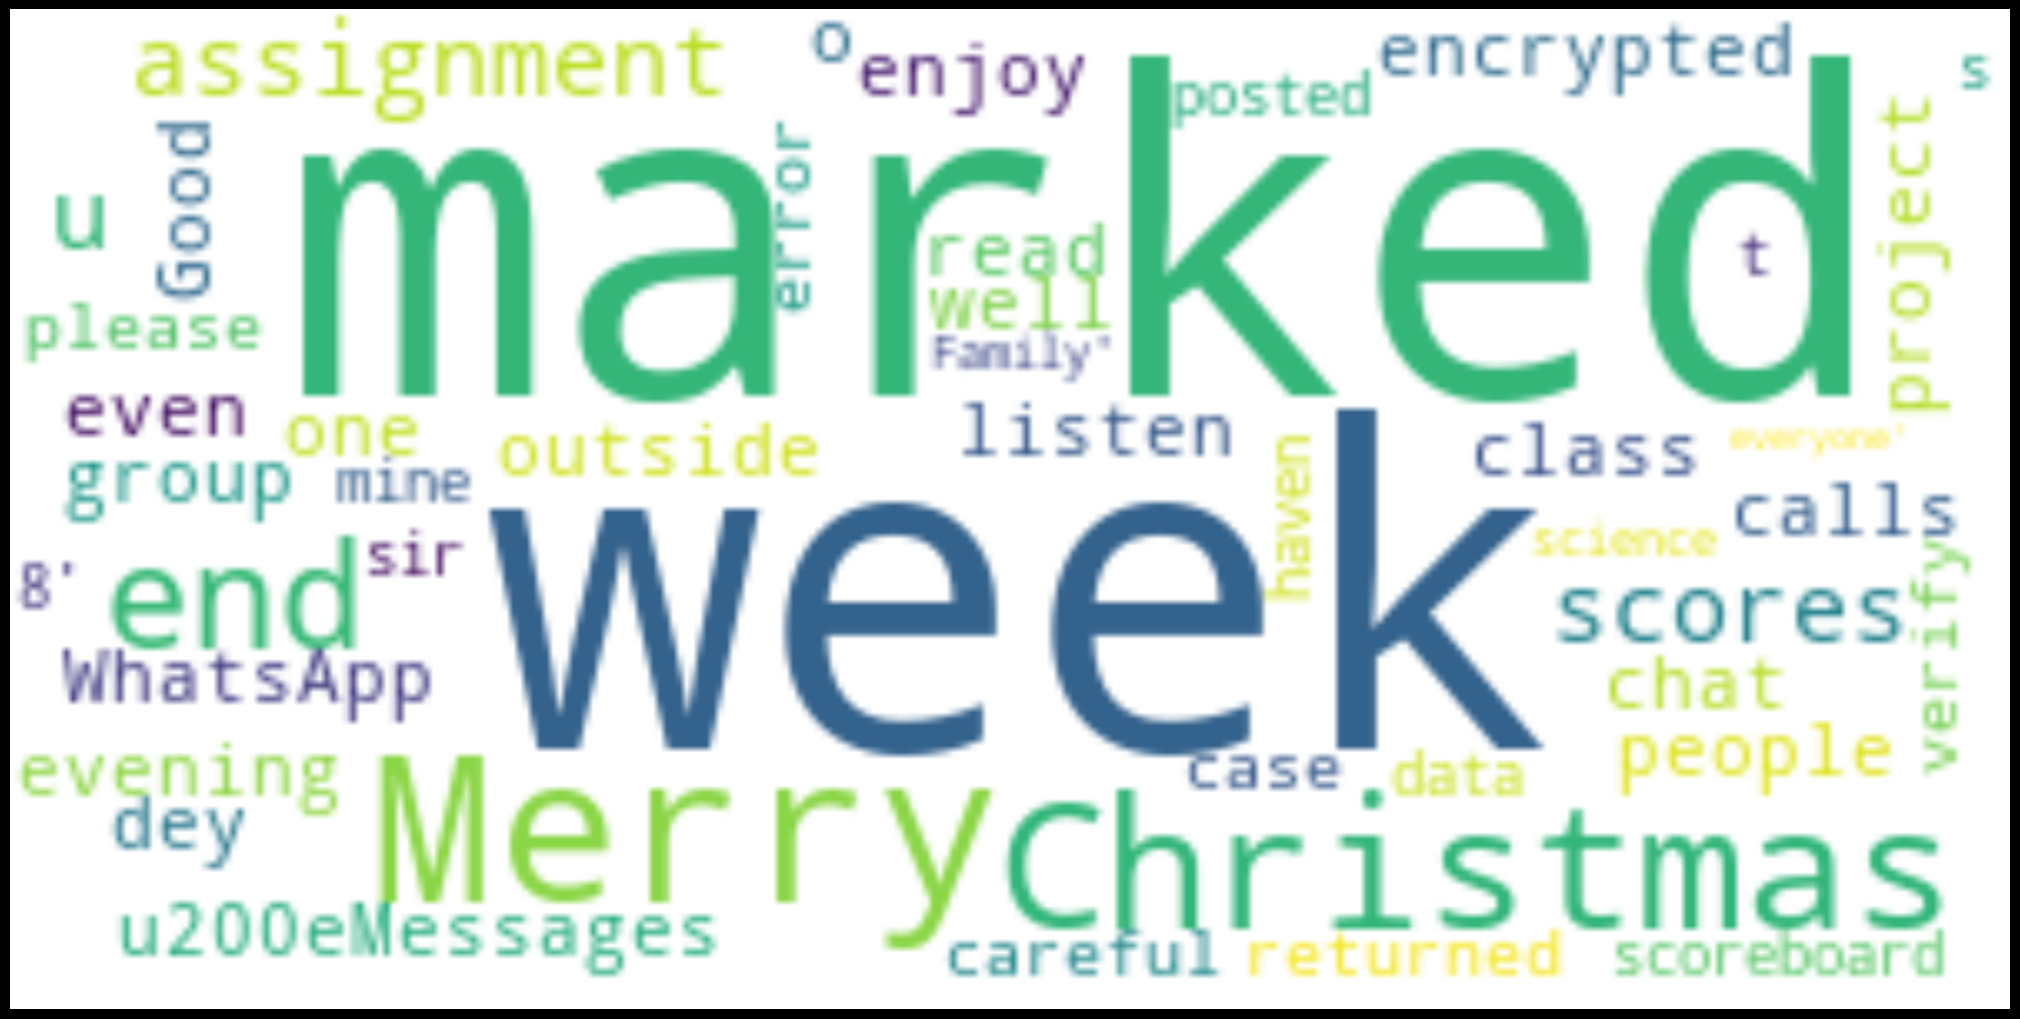

In [25]:
text = df["Text"].values
wordcloud = WordCloud( width = 300,height = 150,background_color = 'white',stopwords = STOPWORDS).generate(str(text))
fig = plt.figure( figsize = (20, 10),facecolor = 'k',edgecolor ='k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

## The above plot is just a picture not the original text as our plot shows the personal content.

## The texts are in native language everyone used to send messages in their own way hence my plot displayed only limited number of words, if the group chats are completely in english then we can gather more frequent words.

## Most active users in the group

In [26]:
Message=df.groupby("Name")["Text"].count().sort_values()

In [27]:
Message=Message.reset_index(drop=False)
Message

,Name,Text
0,"7 assignment submission will end on wed, 11:",0
1,0 AM] Blessing Zacra:,1
2,3 PM] ‪+234 816 224 2454‬: Classwork questions:,1
3,4 AM] Fumilayo Zac:,1
4,4 AM] GG:,1
...,...,...
268,7 PM] ‪+234 816 224 2454‬:,45
269,6 PM] ‪+234 816 224 2454‬:,48
270,4 PM] ‪+234 816 224 2454‬:,48
271,2 PM] ‪+234 816 224 2454‬:,49


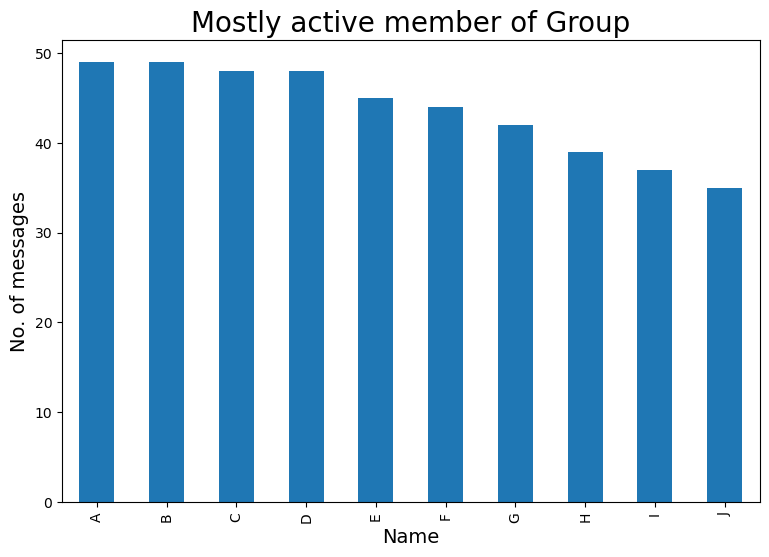

In [37]:
### Mostly Active Author in the Group
plt.figure(figsize=(9,6))
mostly_active = df['Name'].value_counts()
### Top 10 peoples that are mostly active in our Group is : 
m_a = mostly_active.head(10)
bars = ['A','B','C','D','E','F','G','H','I','J']
x_pos = np.arange(len(bars))
m_a.plot.bar()
plt.xlabel('Name',fontdict={'fontsize': 14,'fontweight': 10})
plt.ylabel('No. of messages',fontdict={'fontsize': 14,'fontweight': 10})
plt.title('Mostly active member of Group',fontdict={'fontsize': 20,'fontweight': 8})
plt.xticks(x_pos, bars)
plt.show()

## CONCLUSION
Hence, Whatsapp Chat Analyzer has a number of benefits from gathering various fun facts to understanding the mental state of the participants. In other words, it has a significant place and purpose in our digital ecosystem.